### Reading the data

In [ ]:
# read json.gz files into panda dataframes

import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [ ]:
# data retrieved from https://nijianmo.github.io/amazon/index.html#subsets

# df_video       = getDF('/work/data/Video_Games_5.json.gz')                # 0.15 GB 
# df_clothing    = getDF('/work/data/Clothing_Shoes_and_Jewelry_5.json.gz') # 1.20 GB 
# df_electronics = getDF('/work/data/Electronics_5.json.gz')                # 1.20 GB 
# df_home        = getDF('/work/data/Home_and_Kitchen_5.json.gz')           # 0.93 GB 
# df_movies      = getDF('/work/data/Movies_and_TV_5.json.gz')              # 0.77 GB 

FileNotFoundError: [Errno 2] No such file or directory: '/work/data/Video_Games_5.json.gz'

In [ ]:
'''
column explanations

overall          rating of the product
reviewTime       time of the review (raw)
reviewerID       ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin             ID of the product, e.g. 0000013714
style            a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewerName     name of the reviewer
reviewText       text of the review
summary          summary of the review
unixReviewTime   time of the review (unix time)
vote             helpful votes of the review
image            images that users post after they have received the product
'''

'\ncolumn explanations\n\noverall          rating of the product\nreviewTime       time of the review (raw)\nreviewerID       ID of the reviewer, e.g. A2SUAM1J3GNN3B\nasin             ID of the product, e.g. 0000013714\nstyle            a disctionary of the product metadata, e.g., "Format" is "Hardcover"\nreviewerName     name of the reviewer\nreviewText       text of the review\nsummary          summary of the review\nunixReviewTime   time of the review (unix time)\nvote             helpful votes of the review\nimage            images that users post after they have received the product\n'

For efficiency reasons we reduced each dataset to ~500,000 randomized entries and saved them as pickles

In [ ]:
# example 
# df_movies_frac = df_movies.sample(frac=0.15) # reduce dataset from 3,500,000 entries to 500,000 entries
# df_movies_frac.to_pickle("./movies.pkl", protocol=5) # save new dataset as a pkl file

### Load the pickles ( ͡° ͜ʖ ͡°)

In [ ]:
# pandas version check
!pip show pandas
!pip install pandas==1.3.5

# pickle thing
!pip3 install pickle5

# then restart notebook and clear all variables. Then we should be able to load the pickled dataframes

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /root/venv/lib/python3.9/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: seaborn, geopandas, datascience, altair
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pickle5 as pickle


with open('/work/data/clothing.pkl', 'rb') as fh:
    df_clothing = pickle.load(fh)

with open('/work/data/electronics.pkl', 'rb') as fh:
    df_electronics = pickle.load(fh)

with open('/work/data/home.pkl', 'rb') as fh:
    df_home = pickle.load(fh)

with open('/work/data/movies.pkl', 'rb') as fh:
    df_movies = pickle.load(fh)

with open('/work/data/video.pkl', 'rb') as fh:
    df_video = pickle.load(fh)

### Exploring the data

In [ ]:
all_dfs = [df_clothing, df_electronics, df_home, df_movies, df_video]
all_dfs_string = ['df_clothing', 'df_electronics', 'df_home', 'df_movies', 'df_video']

In [ ]:
for i in range(len(all_dfs)):
    print(all_dfs_string[i][3:])
    print('Unique reviewers: ' , len(all_dfs[i]['reviewerID'].unique()))
    print('Total number of rows: ' ,len(all_dfs[i]))
    print('Average reviews pr person: ' ,len(all_dfs[i])/len(all_dfs[i]['reviewerID'].unique()))
    print('\n')

arts
Unique reviewers:  56210
Total number of rows:  494485
Average reviews pr person:  8.797100160113859


clothing
Unique reviewers:  388604
Total number of rows:  499946
Average reviews pr person:  1.286517894823522


electronics
Unique reviewers:  336248
Total number of rows:  498730
Average reviews pr person:  1.4832207180414456


home
Unique reviewers:  338925
Total number of rows:  482927
Average reviews pr person:  1.4248786604706056


movies
Unique reviewers:  213174
Total number of rows:  511503
Average reviews pr person:  2.399462410988207


video
Unique reviewers:  55223
Total number of rows:  497577
Average reviews pr person:  9.010321786212266




In [ ]:
for i in range(len(all_dfs)):
    print(all_dfs_string[i][3:])
    print(all_dfs[i]['overall'].value_counts())
    print('\n')

arts
5.0    377570
4.0     61145
3.0     28628
1.0     14358
2.0     12784
Name: overall, dtype: int64


clothing
5.0    309853
4.0     92516
3.0     47609
2.0     25580
1.0     24388
Name: overall, dtype: int64


electronics
5.0    319372
4.0     84533
3.0     37339
1.0     34685
2.0     22801
Name: overall, dtype: int64


home
5.0    327988
4.0     72466
3.0     35834
1.0     26276
2.0     20363
Name: overall, dtype: int64


movies
5.0    304301
4.0    100279
3.0     52291
1.0     28760
2.0     25872
Name: overall, dtype: int64


video
5.0    299759
4.0     93654
3.0     49146
1.0     30883
2.0     24135
Name: overall, dtype: int64




In [ ]:
len(all_dfs[0]['reviewerID'].unique())


56210

In [ ]:
print(df_movies['reviewText'].isnull().sum())


# check rows that contain one or more nan
nan_rows = df_movies[df_movies.isnull().T.any()]
nan_rows

0


,overall,reviewerID,reviewText


In [ ]:
# number of reviews per reviewer per category

for i in range(len(all_dfs)):
    print(all_dfs_string[i][3:])
    print(all_dfs[i]['reviewerID'].value_counts())
    print('\n')

arts
A13OFOB1394G31    217
ALYZJ7W14YS26     185
A3NDWL56CCM3Q5    184
A2OYDT4I6AK54P    167
AL7KMEKSLCW84     157
                 ... 
A5AGPUR4P63U7       4
A3VUQQR4G6HAZ       4
A2U3FA2NTCLYND      4
A2T52E9EEEWIER      3
A2NJFRWFN7BLHW      3
Name: reviewerID, Length: 56210, dtype: int64


clothing
AENH50GW3OKDA     21
A3G0F3VRM187KT    19
A2OS7CFQI4DWPT    18
ALFRMOGTO1K4M     18
AVU1ILDDYW301     18
                  ..
AUCD4JXK5P6CQ      1
A2KVE7DIV7FZWK     1
A2CVWG5L03RTMJ     1
A15G43AQI4BIWM     1
A1F2XU4R2E83AH     1
Name: reviewerID, Length: 388604, dtype: int64


electronics
A3OXHLG6DIBRW8    45
A680RUE1FDO8B     42
A5JLAU2ARJ0BO     41
A6FIAB28IS79      38
A31N0XY2UTB25C    37
                  ..
A3PVECXMTTF486     1
A3EN46T7IDP818     1
AYNNJ0DBGL5H7      1
A2MI4HWTWE9DP3     1
A2RMQ9IXRGJJOT     1
Name: reviewerID, Length: 336248, dtype: int64


home
AVU1ILDDYW301     39
A25C2M3QF9G7OQ    36
A1IU7S4HCK1XK0    32
A2GP4EJIAA2OE0    29
A1QBOC76MIOJYP    29
              

## Preprocessing

In [ ]:
# remove unwanted columns
# remove rows with null in reviewText
# alter 'overall'-column to be a sentiment column, either positive (1 or 2) or negative (4 or 5)
# split datasets so we have equal amount of positive and negative reviews in each dataset

In [ ]:
all_dfs_string

['df_arts',
 'df_clothing',
 'df_electronics',
 'df_home',
 'df_movies',
 'df_video']

In [ ]:
# removing unwanted columns

unwanted_columns = ['verified', 'reviewTime', 'asin', 'style', 'reviewerName', 'summary', 'unixReviewTime', 'vote', 'image']

df_clothing = df_clothing.drop(unwanted_columns, axis=1)
df_electronics = df_electronics.drop(unwanted_columns, axis=1)
df_home = df_home.drop(unwanted_columns, axis=1)
df_movies = df_movies.drop(unwanted_columns, axis=1)
df_video = df_video.drop(unwanted_columns, axis=1)

KeyError: "['verified' 'reviewTime' 'asin' 'style' 'reviewerName' 'summary'\n 'unixReviewTime' 'vote' 'image'] not found in axis"

In [ ]:
# only keep rows where reviewText is not na

df_clothing = df_clothing[df_clothing['reviewText'].notna()]
df_home = df_home[df_home['reviewText'].notna()]
df_video = df_video[df_video['reviewText'].notna()]
df_electronics = df_electronics[df_electronics['reviewText'].notna()]
df_movies = df_movies[df_movies['reviewText'].notna()]

In [ ]:
print(df_movies['reviewText'].isnull().sum())

0


In [ ]:
score_dict = {
    1:'negative',
    2:'negative',
    3:'neutral',
    4:'positive',
    5:'positive'
}
df_clothing.overall = df_clothing.overall.apply(lambda x:score_dict[x])
df_home.overall = df_home.overall.apply(lambda x:score_dict[x])
df_video.overall = df_video.overall.apply(lambda x:score_dict[x])
df_electronics.overall = df_electronics.overall.apply(lambda x:score_dict[x])
df_movies.overall = df_movies.overall.apply(lambda x:score_dict[x])

In [ ]:
pos_neg_dict = {}
for i in range(len(all_dfs)):
    pos_neg_dict['positive_{0}'.format(all_dfs_string[i])] = all_dfs[i][all_dfs[i]['overall'] == 'positive' ]
    pos_neg_dict['negative_{0}'.format(all_dfs_string[i])] = all_dfs[i][all_dfs[i]['overall'] == 'negative' ]

In [ ]:
all_dfs_string

['df_arts',
 'df_clothing',
 'df_electronics',
 'df_home',
 'df_movies',
 'df_video']

In [ ]:
# splitting datasets into positive and negative reviews

def splitPosNeg(df):
    df_pos = df[df['overall'] == 'positive']
    df_neg = df[df['overall'] == 'negative']
    return df_pos,df_neg

df_clothing_pos, df_clothing_neg = splitPosNeg(df_clothing)
df_electronics_pos, df_electronics_neg = splitPosNeg(df_electronics)
df_home_pos, df_home_neg = splitPosNeg(df_home)
df_movies_pos, df_movies_neg = splitPosNeg(df_movies)
df_video_pos, df_video_neg = splitPosNeg(df_video)

In [ ]:
# concatenating the dataframes back together with equal amount of positive and negative reviews

def concat_negpos(df_pos, df_neg):
    return pd.concat([df_neg,df_pos.sample(n=len(df_neg),axis = 0,random_state=42)])

df_clothing_equal = concat_negpos(df_clothing_pos, df_clothing_neg)
df_electronics_equal = concat_negpos(df_electronics_pos, df_electronics_neg)
df_home_equal = concat_negpos(df_home_pos, df_home_neg)
df_movies_equal = concat_negpos(df_movies_pos, df_movies_neg)
df_video_equal = concat_negpos(df_video_pos, df_video_neg)

In [ ]:
df_clothing_equal.reset_index(inplace=True)
df_electronics_equal.reset_index(inplace=True)
df_home_equal.reset_index(inplace=True)
df_movies_equal.reset_index(inplace=True)
df_video_equal.reset_index(inplace=True)

In [ ]:
clothing_y = df_clothing_equal['overall'].tolist()
electronics_y = df_electronics_equal['overall'].tolist()
home_y = df_home_equal['overall'].tolist()
movies_y = df_movies_equal['overall'].tolist()
video_y  = df_video_equal['overall'].tolist()

In [ ]:
video_y

['negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',

In [ ]:
import csv
def write_csv(lst,filename):
    with open(filename, "w") as f:
        wr = csv.writer(f)
        wr.writerows(lst)

In [ ]:
write_csv(clothing_y,'/work/data/clothing_y.csv')
write_csv(electronics_y,'/work/data/electronics_y.csv')
write_csv(home_y,'/work/data/home_y.csv')
write_csv(movies_y,'/work/data/movies_y.csv')
write_csv(video_y,'/work/data/video_y.csv')

In [ ]:
df_clothing_equal.to_pickle("/work/data/clothing_equal.pkl", protocol=5)
df_electronics_equal.to_pickle("/work/data/electronics_equal.pkl", protocol=5)
df_home_equal.to_pickle("/work/data/home_equal.pkl", protocol=5)
df_movies_equal.to_pickle("/work/data/movies_equal.pkl", protocol=5)
df_video_equal.to_pickle("/work/data/video_equal.pkl", protocol=5)

In [ ]:
df_movies_equal

,index,overall,reviewerID,reviewText
0,2052158,negative,A2SSI3683COBCY,"Good concept, weak delivery. One dimensional c..."
1,747192,negative,A31DBPJPD3KAQG,Mrs CB cannot act and because she has a big pa...
2,2652899,negative,A25PEXOELOHIBV,Not the greatest
3,2720989,negative,A3CPJYAQMCUGNR,"""Batman vs. Robin""\nHere is a movie about a re..."
4,1659993,negative,A1I1U2M5KSPY1R,Gruesome and strange with no real logic or cle...
...,...,...,...,...
109233,2429803,positive,A3NPCXSNM75QY4,"Awesome show, can't get enough of it!!!"
109234,2077291,positive,AZU4AK2EPRRMU,Saw this movie in the theaters when it was out...
109235,2896287,positive,A3JU2IJP8TCRX9,Finally got the Bluray- the picture improvemen...
109236,1790874,positive,A2QH5YXTKYAZN,Great family movie could watch it a hundred times


## Tokenization

In [ ]:
# TreebankWordTokenizer documentation: https://tedboy.github.io/nlps/generated/generated/nltk.tokenize.TreebankWordTokenizer.html 

import nltk
from nltk.tokenize import (TreebankWordTokenizer,
                           word_tokenize,
                           wordpunct_tokenize,
                           TweetTokenizer,
                           MWETokenizer)

sentence = "It's true, Ms. Martha Jones, she grapped my ass! #MeToo"
#movies_X_tok = TreebankWordTokenizer.tokenize(df_movies_equal.reviewText)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
#nltk.download('stopwords')
tokenizer = TreebankWordTokenizer()
stop_words = set(stopwords.words('english'))
punct = ['!','"','#','$','%','&','\'','(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~', '\'\'', '\"\"', '´´', '``', '...', '--', '\'s', '\'ll', '\'m', '\'re', '\'d', 'n\'t']
for i in punct:
        stop_words.add(i)



def tokamok(df):
    temp_list = []
    df['reviewText'] = df['reviewText'].str.lower()
    for i in df['reviewText']:
        temp_list.append(tokenizer.tokenize(i))
    final_list = []
    for string in temp_list:
        str_list = []
        for w in string:
            if w not in stop_words:
                str_list.append(w)
        final_list.append(str_list)

    return final_list


movies_100 = df_movies_equal[:100]
testtest = tokamok(movies_100)
print(len(testtest))
testtest

100
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-36-2d8bbda433d0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].str.lower()


[['good',
  'concept',
  'weak',
  'delivery.',
  'one',
  'dimensional',
  'characters.',
  'martin',
  'sheen',
  'good'],
 ['mrs', 'cb', 'act', 'big', 'part', 'film', 'ruined', 'imho'],
 ['greatest'],
 ['batman',
  'vs.',
  'robin',
  'movie',
  'real',
  'tough',
  'guy',
  'much',
  'less',
  'super',
  'hero',
  'one',
  'star',
  'nonsense',
  'concept.',
  'movie',
  'opens',
  'batman',
  'beating',
  'bunch',
  'kids.',
  'movie',
  'moves',
  'several',
  'kids',
  'beat',
  'sober',
  'drunk',
  'adults.',
  'culminating',
  'assault',
  'happens',
  'end',
  'ten-year',
  'old',
  'son',
  'batman',
  'gets',
  'good',
  'punches',
  'end',
  'batman',
  'better',
  'man',
  'pummeling',
  'son',
  'submission.',
  'even',
  'batman',
  'sleeping',
  'soaking',
  'wet',
  'ninety-pound',
  'robin',
  'would',
  'win',
  'cowardly',
  'act',
  'like',
  'sucker',
  'punch.',
  'started',
  'age',
  'nine',
  'dad',
  'would',
  'take',
  'business',
  'trips',
  'bondsman',

In [ ]:
# Tokenizing dataframes (and saving as csv locally due to RAM limits in Deepnote)


# clothing_tok = tokamok(df_clothing_equal)
# electronics_tok = tokamok(df_electronics_equal)
# home_tok = tokamok(df_home_equal)
# movies_tok = tokamok(df_movies_equal)
# video_tok = tokamok(df_video_equal)

#import csv


#with open("clothing_tok.csv", "w") as f:
#    wr = csv.writer(f)
#    wr.writerows(clothing_tok)
    
#with open("electronics_tok.csv", "w") as f:
#    wr = csv.writer(f)
#    wr.writerows(electronics_tok)
    
#with open("home_tok.csv", "w") as f:
#    wr = csv.writer(f)
#    wr.writerows(home_tok)
    
#with open("movies_tok.csv", "w") as f:
#    wr = csv.writer(f)
#    wr.writerows(movies_tok)
    
#with open("video_tok.csv", "w") as f:
#    wr = csv.writer(f)
#    wr.writerows(video_tok)

In [ ]:
#Read tokenized data from csv
import csv
def read_x(filename):
    with open(filename, "r") as f:
        csv_reader = csv.reader(f)
        tok_list = list(csv_reader)
    final = []
    for i in range(len(tok_list)):
        if i % 2:
            continue
        else:
            final.append(tok_list[i])
    return final


clothing_X = read_x('/work/data/clothing_tok.csv')
electronics_X = read_x('/work/data/electronics_tok.csv')
home_X = read_x('/work/data/home_tok.csv')
movies_X = read_x('/work/data/movies_tok.csv')
video_X = read_x('/work/data/video_tok.csv')

def read_y(filename):
    with open(filename) as f:
        csv_reader = csv.reader(f)
        lst = list(csv_reader)
    final = [i[0] for i in lst]
    return final


clothing_y = read_y('/work/data/clothing_y.csv')
electronics_y = read_y('/work/data/electronics_y.csv')
home_y = read_y('/work/data/home_y.csv')
movies_y = read_y('/work/data/movies_y.csv')
video_y = read_y('/work/data/video_y.csv')

## Similarity metrics

In [ ]:

from collections import Counter
import pandas as pd
import numpy as np

# Function for creating a dataframe for calculating similarity measures
def joinedFreqDF(X1,X2):
    X1_unnest = []
    X2_unnest = []
    for lst in X1:
        for i in lst:
            X1_unnest.append(i)
    for lst in X2:
        for i in lst:
            X2_unnest.append(i) 
    
    X1cnt = Counter(X1_unnest)
    X2cnt = Counter(X2_unnest)
    
    X1_freq = {k: v / len(X1_unnest) for k,v in X1cnt.items()}
    X2_freq = {k: v / len(X2_unnest) for k,v in X2cnt.items()}

    X1_freq_df = pd.DataFrame.from_dict(X1_freq, orient='index',columns=['prob_X1'])
    X2_freq_df = pd.DataFrame.from_dict(X2_freq, orient='index',columns=['prob_X2'])

    joined_df = X1_freq_df.join(X2_freq_df, how='outer')
    joined_df = joined_df.fillna(0)
    return joined_df
           

In [ ]:

movies_clothing_prob_df = joinedFreqDF(movies_X,clothing_X)
movies_electronics_prob_df = joinedFreqDF(movies_X,electronics_X)
movies_home_prob_df = joinedFreqDF(movies_X,home_X)
movies_video_prob_df = joinedFreqDF(movies_X,video_X)

In [ ]:
movies_clothing_prob_df.loc['prob_X2']

KeyError: 'prob_X2'

In [ ]:
movies_clothing_prob_df

,prob_X1,prob_X2
verything,1.979925e-07,0.000000
dvd,1.979925e-07,0.000000
80s,1.979925e-07,0.000000
also,1.979925e-07,0.000000
at,1.979925e-07,0.000000
...,...,...
~~~~2-pus,1.979925e-07,0.000000
~~~~3-poison,1.979925e-07,0.000000
~~~~bonus,1.979925e-07,0.000000
~~~~~~~~~~~~~~~~~~~~,3.959850e-07,0.000000


In [ ]:
# Divergence metrics examples
# Divergence vs distance: https://stats.stackexchange.com/questions/520557/what-is-meant-by-divergence-in-statistics
# Hellinger distance: https://gist.github.com/larsmans/3116927
# Interpretting KL divergence: https://stats.stackexchange.com/questions/338016/what-constitutes-a-large-kl-divergence and https://stats.stackexchange.com/questions/111445/analysis-of-kullback-leibler-divergence

import numpy as np
from scipy.stats import entropy
from scipy.special import rel_entr, kl_div
from scipy.spatial import distance
from scipy.spatial.distance import euclidean
#from dit.other import renyi_entropy
from math import sqrt, pow, exp
import math

# KL divergance ln
def kl_divergence_ln(p, q):
	return sum(p[i] * math.log(p[i]/q[i]) for i in range(len(p)))

# KL divergance log2
def kl_divergence2(p, q):
	return sum(p[i] * math.log2(p[i]/q[i]) for i in range(len(p)))

# KL divergance log10
def kl_divergence10(p, q):
	return sum(p[i] * math.log10(p[i]/q[i]) for i in range(len(p)))

# Euclidian
def squared_sum(x):
  """ return 3 rounded square rooted value """

  return round(sqrt(sum([a*a for a in x])),3)

def euclidean_distance(x,y):
  """ return euclidean distance between two lists """

  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

# Jaccard (compares text not numerical values)
def jaccard_similarity(x,y):
  """ returns the jaccard similarity between two lists """

  intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
  union_cardinality = len(set.union(*[set(x), set(y)]))
  return intersection_cardinality/float(union_cardinality)

sentences = ["The bottle is empty", "There is nothing in the bottle"]
sentences = [sent.lower().split(" ") for sent in sentences]

# Cosine similarity
def cos_similarity(x,y):
  """ return cosine similarity between two lists 
  
    Cosine Similarity computes the similarity of two vectors as the cosine of 
    the angle between two vectors. It determines whether two vectors are pointing 
    in roughly the same direction. So if the angle between the vectors is 0 degrees, 
    then the cosine similarity is 1.
    """
 
  numerator = sum(a*b for a,b in zip(x,y))
  denominator = squared_sum(x)*squared_sum(y)
  return round(numerator/float(denominator),15)

In [ ]:
#Assigning the probability distributions for calculating the similarity measures

p_mc = movies_clothing_prob_df['prob_X1']
q_mc = movies_clothing_prob_df['prob_X2']

p_me = movies_electronics_prob_df['prob_X1']
q_me = movies_electronics_prob_df['prob_X2']

p_mh = movies_home_prob_df['prob_X1']
q_mh = movies_home_prob_df['prob_X2']

p_mv = movies_video_prob_df['prob_X1']
q_mv = movies_video_prob_df['prob_X2']

In [ ]:
#Cosine similarity

'''
A cosine value of 0 means that the two vectors are orthogonal and have no match. 
The closer the cosine value to 1, the smaller the angle and the greater the match between vectors. 
High score = high similarity
'''

print("Cosine similarity for movies and clothing:", cos_similarity(p_mc, q_mc))
print("Cosine similarity for movies and electronics:", cos_similarity(p_me, q_me))
print("Cosine similarity for movies and home:", cos_similarity(p_mh, q_mh))
print("Cosine similarity for movies and video:", cos_similarity(p_mv, q_mv))


Cosine similarity for movies and arts: 0.591215857837845
Cosine similarity for movies and clothing: 0.531214601374482
Cosine similarity for movies and electronics: 0.634250951545789
Cosine similarity for movies and home: 0.632884010618606
Cosine similarity for movies and video: 0.522630566235645


In [ ]:
cosine_movies_clothing = cos_similarity(p_mc, q_mc)
cosine_movies_electronics = cos_similarity(p_me, q_me)
cosine_movies_home = cos_similarity(p_mh, q_mh)
cosine_movies_video = cos_similarity(p_mv, q_mv)

cosine_df = {'Cosine Distance': [cosine_movies_arts, cosine_movies_clothing, cosine_movies_electronics, cosine_movies_home, cosine_movies_video], 'Domains': ['Movies and Arts', 'Movies and Clothing', 'Movies and Electronics', 'Movies and Home', 'Movies and Video']}
cosine_df = pd.DataFrame(cosine_df)
print(cosine_df)



   Cosine Distance                 Domains
0         0.591216         Movies and Arts
1         0.531215     Movies and Clothing
2         0.634251  Movies and Electronics
3         0.632884         Movies and Home
4         0.522631        Movies and Video


In [ ]:
#Jensen-Shannon distance 

'''
The more “entropy” or “chaos” caused by the interaction between p and q, 
the more “distance” between the two distributions
High score = low similarity
'''

print("Jensen-Shannon distance for movies and clothing:", distance.jensenshannon(p_mc, q_mc))
print("Jensen-Shannon distance for movies and electronics:", distance.jensenshannon(p_me, q_me))
print("Jensen-Shannon distance for movies and home:", distance.jensenshannon(p_mh, q_mh))
print("Jensen-Shannon distance for movies and video:", distance.jensenshannon(p_mv, q_mv))


Jensen-Shannon distance for movies and clothing: 0.5155960388562737
Jensen-Shannon distance for movies and electronics: 0.48120345462691183
Jensen-Shannon distance for movies and home: 0.4893109815428513
Jensen-Shannon distance for movies and video: 0.38979594854625443


   Jensen-Shannon Distance                 Domains
0                 0.506334         Movies and Arts
1                 0.515596     Movies and Clothing
2                 0.481203  Movies and Electronics
3                 0.489311         Movies and Home
4                 0.389796        Movies and Video


<AxesSubplot:>

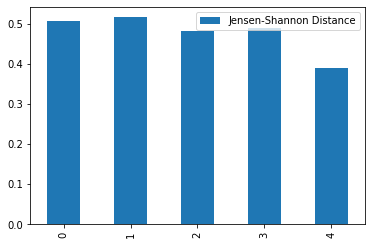

In [ ]:
Jensen_Shannon_movie_clothing = distance.jensenshannon(p_mc, q_mc)
Jensen_Shannon_movie_electronics = distance.jensenshannon(p_me, q_me)
Jensen_Shannon_movie_home = distance.jensenshannon(p_mh, q_mh)
Jensen_Shannon_movie_video = distance.jensenshannon(p_mv, q_mv)

Jensen_Shannon_df = {'Jensen-Shannon Distance': [Jensen_Shannon_movie_clothing, Jensen_Shannon_movie_electronics, Jensen_Shannon_movie_home, Jensen_Shannon_movie_video], 'Domains': ['Movies and Arts', 'Movies and Clothing', 'Movies and Electronics', 'Movies and Home', 'Movies and Video']}
Jensen_Shannon_df = pd.DataFrame(Jensen_Shannon_df)
print(Jensen_Shannon_df)
Jensen_Shannon_df.plot.bar()


In [ ]:
#Euclidean distance

'''
The larger the distance between two vectors, the larger the similarity score and vice versa. 
High score = low similarity.
'''

print("Euclidian distance for movies and clothing:", euclidean_distance(p_mc, q_mc))
print("Euclidian distance for movies and electronics:", euclidean_distance(p_me, q_me))
print("Euclidian distance for movies and home:", euclidean_distance(p_mh, q_mh))
print("Euclidian distance for movies and video:", euclidean_distance(p_mv, q_mv))


Euclidian distance for movies and arts: 0.030741318568821986
Euclidian distance for movies and clothing: 0.036721678312090805
Euclidian distance for movies and electronics: 0.027039847019740885
Euclidian distance for movies and home: 0.02753963680360442
Euclidian distance for movies and video: 0.036641882392177964


   Euclidean Distance                 Domains
0            0.030741         Movies and Arts
1            0.036722     Movies and Clothing
2            0.027040  Movies and Electronics
3            0.027540         Movies and Home
4            0.036642        Movies and Video


<AxesSubplot:>

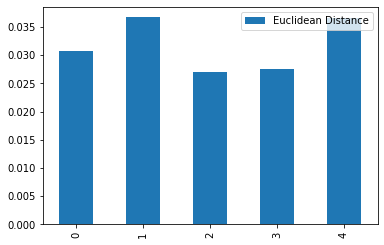

In [ ]:
euclidean_movies_clothing = euclidean_distance(p_mc, q_mc)
euclidean_movies_electronics = euclidean_distance(p_me, q_me)
euclidean_movies_home = euclidean_distance(p_mh, q_mh)
euclidean_movies_video = euclidean_distance(p_mv, q_mv)

euclidean_df = {'Euclidean Distance': [euclidean_movies_clothing, euclidean_movies_electronics, euclidean_movies_home, euclidean_movies_video], 'Domains': ['Movies and Arts', 'Movies and Clothing', 'Movies and Electronics', 'Movies and Home', 'Movies and Video']}
euclidean_df = pd.DataFrame(euclidean_df)
print(euclidean_df)
euclidean_df.plot.bar()

In [ ]:
import seaborn as sns
big_Metric_df = pd.concat([cosine_df, Jensen_Shannon_df, euclidean_df], axis=1)
cols = [1]
big_Metric_df.drop(big_Metric_df.columns[cols],axis=1,inplace=True)
big_Metric_df
Domains = ['Movies and Clothing', 'Movies and Electronics', 'Movies and Home', 'Movies and Video']
big_Metric_df['Domains'] = Domains
big_Metric_df


,Cosine Distance,Jensen-Shannon Distance,Euclidean Distance,Domains
0,0.591216,0.506334,0.030741,Movies and Arts
1,0.531215,0.515596,0.036722,Movies and Clothing
2,0.634251,0.481203,0.027040,Movies and Electronics
3,0.632884,0.489311,0.027540,Movies and Home
4,0.522631,0.389796,0.036642,Movies and Video


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


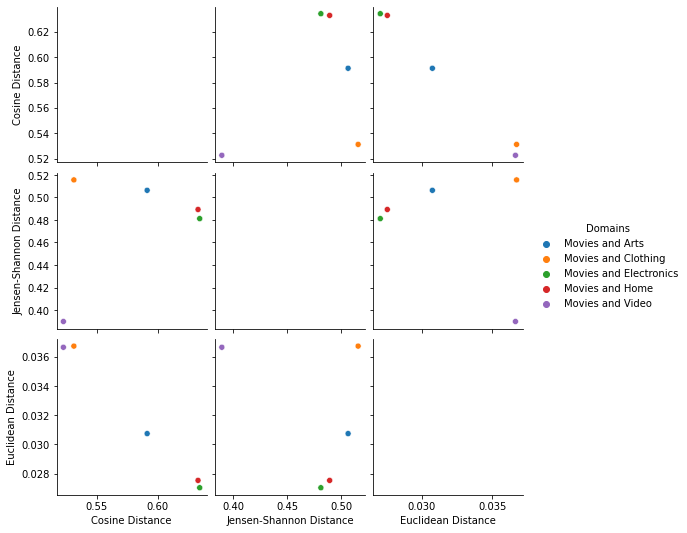

In [ ]:
sns.pairplot(big_Metric_df, hue='Domains', size=2.5);

In [ ]:
_deepnote_run_altair(Jensen_Shannon_df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Domains","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Jensen-Shannon Distance","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"Domains","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [ ]:
#sns.barplot(x='Domains', y='Cosine Distance', data = big_Metric_df)

In [ ]:
#Kullback-Leibler
print("Entropy for movies and clothing:", entropy(p_mc, q_mc))
print("Entropy for movies and electronics:", entropy(p_me, q_me))
print("Entropy for movies and home:", entropy(p_mh, q_mh))
print("Entropy for movies and video:", entropy(p_mv, q_mv))

Entropy for movies and arts: inf
Entropy for movies and clothing: inf
Entropy for movies and electronics: inf
Entropy for movies and home: inf
Entropy for movies and video: inf


In [ ]:
#Keeping just in case
print("Entropy", entropy(p, q))
print("Relative entropy", sum(rel_entr(p, q)))
print("Kullback-Leibler divergence", sum(kl_div(p, q)))
#print("Kullback-Leibler divergence with ln", kl_divergence_ln(p, q))
#print("Kullback-Leibler divergence with log(2)", kl_divergence2(p, q))
#print("Kullback-Leibler divergence with log(10)", kl_divergence10(p, q))
print("Cosine similarity", cos_similarity(p, q))
print("Jensen-Shannon distance", distance.jensenshannon(p, q))
print("Hellinger distance", euclidean(np.sqrt(p), np.sqrt(q)) / np.sqrt(2))
print("Euclidian distance", euclidean_distance(p, q))

#print("Renyi entropy with alpha = 0 (Hartley entropy)", )
#print("Renyi entropy with alpha = 1 (KL divergence)", )
#print("Renyi entropy with alpha = 2 (Collision entropy)", )
#print("Jaccard index", jaccard_similarity(sentences[0], sentences[1])) # compares sentences instead of floats

NameError: name 'p' is not defined

In [ ]:
movies_clothing_prob_df.loc[movies_clothing_prob_df['prob_X2']==0]

,prob_X1,prob_X2
verything,1.979925e-07,0.0
dvd,1.979925e-07,0.0
80s,1.979925e-07,0.0
also,1.979925e-07,0.0
at,1.979925e-07,0.0
...,...,...
~~~~1-pain,1.979925e-07,0.0
~~~~2-pus,1.979925e-07,0.0
~~~~3-poison,1.979925e-07,0.0
~~~~bonus,1.979925e-07,0.0


In [ ]:
def distance_to_similarity(distance):
  return 1/exp(distance)

distance_to_similarity(entropy(p, q)) 

4.798644595751473e-07

In [ ]:

movies_X_uniq = pd.Series(movies_X).explode().value_counts()
#movies_60000_uniq_tokamok = pd.Series(movies_60000_tokamok).explode().value_counts()

print("Dataset: Top 100 tokens:","\n",movies_X_uniq[:100],"\n")
#print("movies 60000 dataset, top 10 tokens:","\n",movies_60000_uniq_tokamok[:10])

#Turning above pd.series into dataframes, for ease of use later
movies_X_uniq = movies_X_uniq.to_frame().reset_index()
#movies_60000_uniq_tokamok = movies_60000_uniq_tokamok.to_frame().reset_index()

#Renaming columns in dataframes
movies_X_uniq.columns = ["token","count"]
#movies_60000_uniq_tokamok.columns = ["token","count"]

NameError: name 'pd' is not defined

In [ ]:
#Types == Amount of different Tokens in dataset
data_types = len(movies_X_uniq["token"])
print("Dataset mount of tokens:  {}".format(data_types))

#Tokens == Amount of all "Words" in dataset
dataset_tokens = movies_X_uniq["count"].sum()
print("Dataset amount of words: {}".format(dataset_tokens))

#Type/token ratio (=ttratio)
dataset_ttratio = data_types/dataset_tokens
print("Dataset type/token ratio: {:.4f}".format(dataset_ttratio))

Dataset mount of tokens:  39973
Dataset amount of words: 1061894
Dataset type/token ratio: 0.0376


## Training baseline model on movies dataset

In [ ]:
#Function for preparing the data to be vectorized
def VecPrep(X):
    X_alt = []
    for lst in X:
        temp = ''
        for tok in lst:
            temp = temp + tok
            temp += ' '
        X_alt.append(temp)
    return X_alt

In [ ]:
movies_X_alt = VecPrep(movies_X)

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
movies_train_X, movies_test_X, movies_train_y, movies_test_y = train_test_split(movies_X_alt,movies_y,test_size=0.2,random_state=42)

In [ ]:
# len(movies_train_X) == len(movies_train_y)
print(len(movies_train_X))
print(len(movies_train_y))
print(len(movies_test_X))
print(len(movies_test_y))

87390
87390
21848
21848


In [ ]:
# import models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

log_clf = LogisticRegression(solver='sag')
vectorizer = TfidfVectorizer()

movies_train_X_vec = vectorizer.fit_transform(movies_train_X)
movies_test_X_vec = vectorizer.transform(movies_test_X)

In [ ]:
log_clf.fit(movies_train_X_vec,movies_train_y)
pred = log_clf.predict(movies_test_X_vec)
print(np.sum((pred == movies_test_y)/len(pred))) # prints 0.8796

0.8796228487733431


In [ ]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier
SGDClf = SGDClassifier()
SGDClf.fit(movies_train_X_vec, movies_train_y)

SGDClassifier()

In [ ]:
pred = SGDClf.predict(movies_test_X_vec)
print(np.sum((pred == movies_test_y)/len(pred)))

0.8758696448187476


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFClf = RandomForestClassifier(max_depth=20)
RFClf.fit(movies_train_X_vec,movies_train_y)

RandomForestClassifier(max_depth=20)

In [ ]:
pred = RFClf.predict(movies_test_X_vec)
print(np.sum((pred == movies_test_y)/len(pred)))

0.7250091541559869


## Ablation Study

In [ ]:
#What effect will it have to: 
#(1) disable the tokenizer
#(2) disable the stop words removal

In [ ]:
import pickle5 as pickle

with open('/work/data/movies_equal.pkl', 'rb') as fh:
    df_movies_equal = pickle.load(fh)


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
punct = ['!','"','#','$','%','&','\'','(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~', '\'\'', '\"\"', '´´', '``', '...', '--', '\'s', '\'ll', '\'m', '\'re', '\'d', 'n\'t']
for i in punct:
    stop_words.add(i)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Data for testing effect of disabling the tokenizer
movies_X_notok = list(df_movies_equal['reviewText'])


In [ ]:
#Tokenizer without removing stopwords
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
def tokamok_noStopwords(df):
    temp_list = []
    df['reviewText'] = df['reviewText'].str.lower()
    for i in df['reviewText']:
        temp_list.append(tokenizer.tokenize(i))
    return temp_list

In [ ]:
#Data for testing effect of disabling stop words removal
movies_X_nostop= tokamok_noStopwords(df_movies_equal)

In [ ]:
movies_X_nostop_alt = VecPrep(movies_X_nostop)

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
movies_train_X_nostop, movies_test_X_nostop, movies_train_y, movies_test_y = train_test_split(movies_X_nostop_alt,movies_y,test_size=0.2,random_state=42)

movies_train_X_notok, movies_test_X_notok, movies_train_y, movies_test_y = train_test_split(movies_X_notok,movies_y,test_size=0.2,random_state=42)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer_stopWords = TfidfVectorizer(stop_words=stop_words)

movies_train_X_nostop_vec = vectorizer.fit_transform(movies_train_X_nostop)
movies_test_X_nostop_vec = vectorizer.transform(movies_test_X_nostop)

movies_train_X_notok_vec = vectorizer_stopWords.fit_transform(movies_train_X_notok)
movies_test_X_notok_vec = vectorizer_stopWords.transform(movies_test_X_notok)

In [ ]:
#Testing the disabling of the removal of stopwords
from sklearn.linear_model import LogisticRegression
import numpy as np

logClf_nostop = LogisticRegression(solver='sag')
logClf_nostop.fit(movies_train_X_nostop_vec,movies_train_y)

#Slightly better result when disabling the removal of stop words
pred = logClf_nostop.predict(movies_test_X_nostop_vec)
print(np.sum((pred == movies_test_y)/len(pred)))

#0.892301354815086

0.892301354815086


In [ ]:
#Testing the effects of diabling the tokenizer
logClf_notok = LogisticRegression(solver='sag')
logClf_notok.fit(movies_train_X_notok_vec,movies_train_y)

#Slightly worse result
pred = logClf_notok.predict(movies_test_X_notok_vec)
print(np.sum((pred == movies_test_y)/len(pred)))

#0.8783870377151226

0.8783870377151226


## Testing the model on the other domains

In [ ]:
#Preparing the data
clothing_X_alt = VecPrep(clothing_X)
electronics_X_alt = VecPrep(electronics_X)
home_X_alt = VecPrep(home_X)
video_X_alt = VecPrep(video_X)

In [ ]:
len(arts_X)==len(arts_y) 

False

In [ ]:
#Splitting data

clothing_train_X, clothing_test_X, clothing_train_y, clothing_test_y = train_test_split(clothing_X_alt,clothing_y,test_size=0.2,random_state=42)

electronics_train_X, electronics_test_X, electronics_train_y, electronics_test_y = train_test_split(electronics_X_alt,electronics_y,test_size=0.2,random_state=42)

home_train_X, home_test_X, home_train_y, home_test_y = train_test_split(home_X_alt,home_y,test_size=0.2,random_state=42)

video_train_X, video_test_X, video_train_y, video_test_y = train_test_split(video_X_alt,video_y,test_size=0.2,random_state=42)

In [ ]:
clothing_test_X_vec = vectorizer.transform(clothing_test_X)

electronics_test_X_vec = vectorizer.transform(electronics_test_X)

home_test_X_vec = vectorizer.transform(home_test_X)

video_test_X_vec = vectorizer.transform(video_test_X)

### Cross domain predictions using the baseline model

In [ ]:
pred = log_clf.predict(clothing_test_X_vec)
print(np.sum((pred == clothing_test_y)/len(pred))) # prints 0.8224

0.8224724724724726


In [ ]:
pred = log_clf.predict(electronics_test_X_vec)
print(np.sum((pred == electronics_test_y)/len(pred))) # prints 0.8076

0.8076454727320169


In [ ]:
pred = log_clf.predict(video_test_X_vec)
print(np.sum((pred == video_test_y)/len(pred))) # prints 0.8439

0.8438991138377642


In [ ]:
pred = log_clf.predict(home_test_X_vec)
print(np.sum((pred == home_test_y)/len(pred))) # prints 0.8228

0.8228262034952288


From these results it seems entropy is prefered over spatial distance when using similarity metrics to predict performance. In other words, there is a correlation between Jensen-Shannon similarity scores and accuracy

![Picture title](image-20220525-131641.png)

### Diversity test

In [ ]:
# new train splits to increase robustness with diversity

# based on Shannon scores = 109,238 samples
# movies       0.200 = 21848 samples
# clothing     0.220 = 24032 samples 
# home         0.210 = 22940 samples
# electronics  0.205 = 22394 samples
# video        0.165 = 18024 samples

# equal split = 109,238 samples
# movies       0.2 = 21848 samples
# clothing     0.2 = 21847 samples
# home         0.2 = 21848 samples
# electronics  0.2 = 21847 samples
# video        0.2 = 21848 samples

# baseline = 109,238 samples (train and test total)
# movies       1.0
# clothing     0.0
# home         0.0
# electronics  0.0
# video        0.0

In [ ]:
# new Shannon based split for further testing

JSD_list = [0.2,0.22,0.21,0.205,0.165]
test_list = []
for i in JSD_list:
    a = i * 5 
    b = a * a * a *
    c = b/5
    test_list.append(c)
values = np.array(test_list)
normalised_JSD_percentages = values / values.sum()
normalised_JSD_percentages = list(normalised_JSD_percentages)
normalised_JSD_percentages

[0.19059710051182763,
 0.27905321485936696,
 0.2316719669040047,
 0.21038353646070407,
 0.08829418126409656]

In [ ]:
# equal percentage split
movies_equal_percent=(21848/len(movies_X))
clothing_equal_percent=(21848/len(clothing_X))
electronics_equal_percent=(21848/len(electronics_X))
video_equal_percent=(21847/len(video_X))
home_equal_percent=(21847/len(home_X))

# Shannon percentage split
movies_JSD_percent=((0.2*len(movies_X))/len(movies_X))
clothing_JSD_percent=((0.22*len(movies_X))/len(clothing_X))
electronics_JSD_percent=((0.21*len(movies_X))/len(electronics_X))
video_JSD_percent=((0.205*len(movies_X))/len(video_X))
home_JSD_percent=((0.165*len(movies_X))/len(home_X))

In [ ]:
# Shannon percentage split extreme
movies_JSD_percent_new=((0.19059710051182763*len(movies_X))/len(movies_X))
clothing_JSD_percent_new=((0.27905321485936696*len(movies_X))/len(clothing_X))
electronics_JSD_percent_new=((0.2316719669040047*len(movies_X))/len(electronics_X))
video_JSD_percent_new=((0.21038353646070407*len(movies_X))/len(video_X))
home_JSD_percent_new=((0.08829418126409656*len(movies_X))/len(home_X))

In [ ]:
# new 20% splits
from sklearn.model_selection import train_test_split
_, movies_X20, _, movies_y20 = train_test_split(movies_X_alt,movies_y,test_size=0.2,random_state=42)
_, electronics_X20, _, electronics_y20 = train_test_split(electronics_X_alt,electronics_y,test_size=electronics_equal_percent,random_state=42)
_, home_X20, _, home_y20 = train_test_split(home_X_alt,home_y,test_size=home_equal_percent,random_state=42)
_, video_X20, _, video_y20 = train_test_split(video_X_alt,video_y,test_size=video_equal_percent,random_state=42)
_, clothing_X20, _, clothing_y20 = train_test_split(clothing_X_alt,clothing_y,test_size=clothing_equal_percent,random_state=42)

In [ ]:
# new JSD splits
from sklearn.model_selection import train_test_split
_, movies_JSDX20, _, movies_JSDy20 = train_test_split(movies_X_alt,movies_y,test_size=0.2,random_state=42)
_, electronics_JSDX20, _, electronics_JSDy20 = train_test_split(electronics_X_alt,electronics_y,test_size=electronics_JSD_percent,random_state=42)
_, home_JSDX20, _, home_JSDy20 = train_test_split(home_X_alt,home_y,test_size=home_JSD_percent,random_state=42)
_, video_JSDX20, _, video_JSDy20 = train_test_split(video_X_alt,video_y,test_size=video_JSD_percent,random_state=42)
_, clothing_JSDX20, _, clothing_JSDy20 = train_test_split(clothing_X_alt,clothing_y,test_size=clothing_JSD_percent,random_state=42)

In [ ]:
# new JSD splits extreme
from sklearn.model_selection import train_test_split
_, movies_JSDX20_new, _, movies_JSDy20_new = train_test_split(movies_X_alt,movies_y,test_size=movies_JSD_percent_new,random_state=42)
_, electronics_JSDX20_new, _, electronics_JSDy20_new = train_test_split(electronics_X_alt,electronics_y,test_size=electronics_JSD_percent_new,random_state=42)
_, home_JSDX20_new, _, home_JSDy20_new = train_test_split(home_X_alt,home_y,test_size=home_JSD_percent_new,random_state=42)
_, video_JSDX20_new, _, video_JSDy20_new = train_test_split(video_X_alt,video_y,test_size=video_JSD_percent_new,random_state=42)
_, clothing_JSDX20_new, _, clothing_JSDy20_new = train_test_split(clothing_X_alt,clothing_y,test_size=clothing_JSD_percent_new,random_state=42)

In [ ]:
# new splits concatenated
all_20_X = movies_X20+electronics_X20+home_X20+video_X20+clothing_X20
all_20_y = movies_y20+electronics_y20+home_y20+video_y20+clothing_y20
all_JSD_X = movies_JSDX20+electronics_JSDX20+home_JSDX20+video_JSDX20+clothing_JSDX20
all_JSD_y = movies_JSDy20+electronics_JSDy20+home_JSDy20+video_JSDy20+clothing_JSDy20
all_JSD_X = all_JSD_X[:-2]
all_JSD_y = all_JSD_y[:-2]

In [ ]:
# new extreme splits concatenated
all_JSD_X_new = movies_JSDX20_new+electronics_JSDX20_new+home_JSDX20_new+video_JSDX20_new+clothing_JSDX20_new
all_JSD_y_new = movies_JSDy20_new+electronics_JSDy20_new+home_JSDy20_new+video_JSDy20_new+clothing_JSDy20_new
all_JSD_X_new = all_JSD_X_new[:-3]
all_JSD_y_new = all_JSD_y_new[:-3]

In [ ]:
print(len(all_JSD_X_new))
print(len(all_JSD_y_new))

In [ ]:
train_20_X, test_20_X, train_20_Y, test_20_Y = train_test_split(all_20_X,all_20_y, test_size=0.2, random_state=42)
train_JSD_X, test_JSD_X, train_JSD_Y, test_JSD_Y = train_test_split(all_JSD_X, all_JSD_y, test_size=0.2, random_state=42)

In [ ]:
train_JSD_X_new, test_JSD_X_new, train_JSD_Y_new, test_JSD_Y_new = train_test_split(all_JSD_X_new, all_JSD_y_new, test_size=0.2, random_state=42)

In [ ]:
print(len(train_20_X))
print(len(test_20_Y))
print(len(test_20_X))

print(len(train_JSD_X_new))
print(len(train_JSD_Y_new))

In [ ]:

from sklearn.linear_model import LogisticRegression

train_20_X_vec = vectorizer.transform(train_20_X)
test_20_X_vec = vectorizer.transform(test_20_X)

train_JSD_X_vec = vectorizer.transform(train_JSD_X)
test_JSD_X_vec = vectorizer.transform(test_JSD_X)

train_JSD_X_new_vec = vectorizer.transform(train_JSD_X_new)
test_JSD_X_new_vec = vectorizer.transform(test_JSD_X_new)

In [ ]:
# running mixed train on mixed test = 0.8768

log_clf.fit(train_20_X_vec,train_20_Y)
pred = log_clf.predict(test_20_X_vec)
print(np.sum((pred == test_20_Y)/len(pred))) 

In [ ]:
# running JSD mixed train on JSD mixed test = 0.8765

log_clf.fit(train_JSD_X_vec,train_JSD_Y)
pred = log_clf.predict(test_JSD_X_vec)
print(np.sum((pred == test_JSD_Y)/len(pred))) 

In [ ]:
# running movies baseline on mixed test set = 0.8332

log_clf.fit(movies_train_X_vec,movies_train_y)
pred = log_clf.predict(test_20_X_vec)
print(np.sum((pred == test_20_Y)/len(pred))) 

## Running new train splits on each domain

In [ ]:
# clothing
log_clf.fit(movies_train_X_vec,movies_train_y)
pred = log_clf.predict(clothing_test_X_vec)
log_clf.fit(train_20_X_vec,train_20_Y)
pred1 = log_clf.predict(clothing_test_X_vec)
log_clf.fit(train_JSD_X_vec,train_JSD_Y)
pred2 = log_clf.predict(clothing_test_X_vec)
log_clf.fit(train_JSD_X_new_vec,train_JSD_Y_new)
pred3 = log_clf.predict(clothing_test_X_vec)
print('Clothing')
print('Base', np.sum((pred == clothing_test_y)/len(pred)))
print('20%', np.sum((pred1 == clothing_test_y)/len(pred1)))
print('JSD', np.sum((pred2 == clothing_test_y)/len(pred2))) 
print('JSE', np.sum((pred3 == clothing_test_y)/len(pred3))) 
print('\n')

# electronics
log_clf.fit(movies_train_X_vec,movies_train_y)
pred = log_clf.predict(electronics_test_X_vec)
log_clf.fit(train_20_X_vec,train_20_Y)
pred1 = log_clf.predict(electronics_test_X_vec)
log_clf.fit(train_JSD_X_vec,train_JSD_Y)
pred2 = log_clf.predict(electronics_test_X_vec)
log_clf.fit(train_JSD_X_new_vec,train_JSD_Y_new)
pred3 = log_clf.predict(electronics_test_X_vec)
print('Electronics')
print('Base', np.sum((pred == electronics_test_y)/len(pred)))
print('20%', np.sum((pred1 == electronics_test_y)/len(pred1)))
print('JSD', np.sum((pred2 == electronics_test_y)/len(pred2)))
print('JSE', np.sum((pred3 == electronics_test_y)/len(pred3)))  
print('\n')

# home
log_clf.fit(movies_train_X_vec,movies_train_y)
pred = log_clf.predict(home_test_X_vec)
log_clf.fit(train_20_X_vec,train_20_Y)
pred1 = log_clf.predict(home_test_X_vec)
log_clf.fit(train_JSD_X_vec,train_JSD_Y)
pred2 = log_clf.predict(home_test_X_vec)
log_clf.fit(train_JSD_X_new_vec,train_JSD_Y_new)
pred3 = log_clf.predict(home_test_X_vec)
print('Home')
print('Base', np.sum((pred == home_test_y)/len(pred)))
print('20%', np.sum((pred1 == home_test_y)/len(pred1)))
print('JSD', np.sum((pred2 == home_test_y)/len(pred2)))
print('JSE', np.sum((pred3 == home_test_y)/len(pred3)))  
print('\n')

# video
log_clf.fit(movies_train_X_vec,movies_train_y)
pred = log_clf.predict(video_test_X_vec)
log_clf.fit(train_20_X_vec,train_20_Y)
pred1 = log_clf.predict(video_test_X_vec)
log_clf.fit(train_JSD_X_vec,train_JSD_Y)
pred2 = log_clf.predict(video_test_X_vec)
log_clf.fit(train_JSD_X_new_vec,train_JSD_Y_new)
pred3 = log_clf.predict(video_test_X_vec)
print('Video')
print('Base', np.sum((pred == video_test_y)/len(pred)))
print('20%', np.sum((pred1 == video_test_y)/len(pred1)))
print('JSD', np.sum((pred2 == video_test_y)/len(pred2))) 
print('JSE', np.sum((pred3 == video_test_y)/len(pred3))) 
print('\n')

# movies
log_clf.fit(movies_train_X_vec,movies_train_y)
pred = log_clf.predict(movies_test_X_vec)
log_clf.fit(train_20_X_vec,train_20_Y)
pred1 = log_clf.predict(movies_test_X_vec)
log_clf.fit(train_JSD_X_vec,train_JSD_Y)
pred2 = log_clf.predict(movies_test_X_vec)
log_clf.fit(train_JSD_X_new_vec,train_JSD_Y_new)
pred3 = log_clf.predict(movies_test_X_vec)
print('Movies')
print('Base', np.sum((pred == movies_test_y)/len(pred)))
print('20%', np.sum((pred1 == movies_test_y)/len(pred1)))
print('JSD', np.sum((pred2 == movies_test_y)/len(pred2))) 
print('JSE', np.sum((pred3 == movies_test_y)/len(pred3))) 
print('\n')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e2d3fe4-0efa-4e24-ba60-5db2d9940cc3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>